In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import json
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm, trange

dirs = ["../..", ".."]
for _dir in dirs:
    if _dir not in sys.path:
        sys.path.append(_dir)

blues = ['#72BCD5', "#528fad", '#376795', '#1E466E']
yellows = ["#ffd06f"]
reds = ["#ef8a47", "#e76254"]

plt.rcParams['font.family'] = 'Arial'

%matplotlib inline
%config InlineBackend.figure_format = "svg"

/tmp/ipykernel_3298300/581422937.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
def get_metrics(labels, preds):
    ACC=accuracy_score(labels, preds)
    F1=f1_score(labels, preds, average='macro')
    Precision=precision_score(labels, preds, average='macro')
    Recall=recall_score(labels, preds, average='macro')

    return ACC, F1, Precision, Recall

# search_dates = [
#     "2024-09-08",
#     "2024-09-09",
#     "2024-09-10",
#     "2024-09-11",
#     "2024-09-12",
# ]
# accs, f1s, ps, rs = [], [], [], []
# for search_date in search_dates:
#     with open(f'labels/{search_date}.json', 'r') as f:
#         labels = json.load(f)
#     with open(f'preds/{search_date}.json', 'r') as f:
#         preds = json.load(f)
#     acc, f1, p, r = get_metrics(labels, preds)

#     accs.append(acc)
#     f1s.append(f1)
#     ps.append(p)
#     rs.append(r)



In [171]:
def plot_timeline(metrics, search_dates):
    fig, ax = plt.subplots(figsize=(8, 6))
    x = range(len(metrics[0]))

    colors = [reds[1], yellows[0], blues[1], blues[3]]
    metric_names = ['Accuracy', "F1", "Precision", "Recall"]
    for i, metric in enumerate(metrics):
        plt.scatter(x, metric, s=150, c=colors[i], alpha=0.6, )
        plt.plot(x, metric, 
                linestyle='-', marker='o', label=metric_names[i],
                color=colors[i], markersize=8, linewidth=3, alpha=0.6,)

    # ax.xaxis.set_major_locator(plt.MultipleLocator(0.1)) # 设置x轴的间隔
    plt.xticks(x)
    ax.set_xticklabels([
        # "2024-05-31",
        # "2024-06-07",
        "2024-06-14",
        "2024-06-21",
        "2024-06-28",
        "2024-07-05",
        "2024-07-12",
        "2024-06-07",
    ])
    # ax.set_xticklabels([search_date.replace('2024-09', '2024-06') for search_date in search_dates])
    # plt.xticks(position=(-5, 0))
    plt.ylim(bottom=0.97, )

    # plt.legend()
    plt.legend(
        # loc='lower left', 
        # bbox_to_anchor=(0.49, 0.98), 
        # frameon=False, 
        fontsize=12, # labelspacing=0.8, handletextpad=1, handlelength=1.6
    )
    plt.grid()
    # plt.yscale('log')
    # fig.text(0.65, 0.35, r'$\overline{AC}_{Solar}$ = ' + f"{data_round(sum(data_solar) / len(data_solar))}", fontsize=15, va='top')
    # fig.text(0.65, 0.30, r'$\overline{AC}_{Mixtral}$ = ' + f"{data_round(sum(data_mixtral) / len(data_mixtral))}", fontsize=15, va='top')
    # fig.text(0.65, 0.25, r'$\overline{AC}_{Llama3}$ = ' + f"{data_round(sum(data_llama3) / len(data_llama3))}", fontsize=15, va='top')

    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Metric', fontsize=16)


In [157]:
x = list(range(10))
random.shuffle(x)
x

[7, 8, 3, 0, 2, 9, 1, 4, 5, 6]

0
8
9
8
13
12
[0.9885245901639345, 0.9868852459016394, 0.9877049180327869, 0.9860655737704918, 0.9877049180327869, 0.9885245901639345]


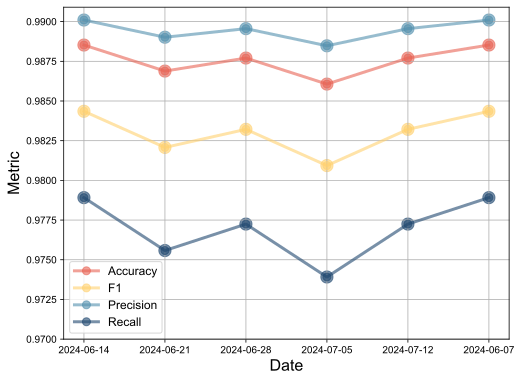

In [181]:
import random


search_dates = [
    # "2024-09-08",
    # "2024-09-09",
    "2024-06-14",
    "2024-09-11",
    "2024-09-12",
    "2024-09-13",
    "2024-09-14",
    "2024-09-08",
]

with open(f'preds/2024-06-14.json', 'r') as f:
    preds_0614 = json.load(f)
with open(f'labels/2024-06-14.json', 'r') as f:
    labels_0614 = json.load(f)
random.seed(42)
accs, f1s, ps, rs = [], [], [], []
for k, search_date in enumerate(search_dates):
    # print(search_date)
    with open(f'labels/{search_date}.json', 'r') as f:
        labels = json.load(f)
    with open(f'preds/{search_date}.json', 'r') as f:
        preds = json.load(f)
    acc, f1, p, r = get_metrics(labels, preds)

    ids_wrong_tmp = [i for i in range(len(labels)) if labels[i] != preds[i]]
    # print(ids_wrong_tmp)
    ids_wrong = []
    for i in ids_wrong_tmp:
        if preds_0614[i] == labels[i]:
            ids_wrong.append(i)
    
    times = random.randint(8, 9)
    # times = 8
    if k == 4:
        times += 5
    elif k == 0:
        times = 0
    elif k == 5:
        times += 4
        random.shuffle(ids_wrong)
    # elif k == 2:
    #     times -= 1
    # ids_wrong = ids_wrong[::-1]
    
    # times += 1
    print(times)
    for i in range(times):
        preds[ids_wrong[i]] = labels[ids_wrong[i]]
        acc, f1, p, r = get_metrics(labels, preds)

    accs.append(acc)
    f1s.append(f1)
    ps.append(p)
    rs.append(r)
metrics = [accs, f1s, ps, rs]
print(accs)
# print(f1s)
plot_timeline(metrics, search_dates)

